In [23]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [24]:
#importing dataset
data_filename = 'Cancer_Data.csv'

In [25]:
data = pd.read_csv(data_filename)

In [26]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [27]:
data.info() # general information of the data
print(data["Unnamed: 32"]) # a column that is completely null
print(data["id"]) # an unnecessary value for the algorithm
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [28]:
data.drop(["id","Unnamed: 32"], axis = 1, inplace = True) #"axis = 1" indicates to delete the whole column |"inpalce = True" means replace master data, does not create a copy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [29]:
data.shape

(569, 31)

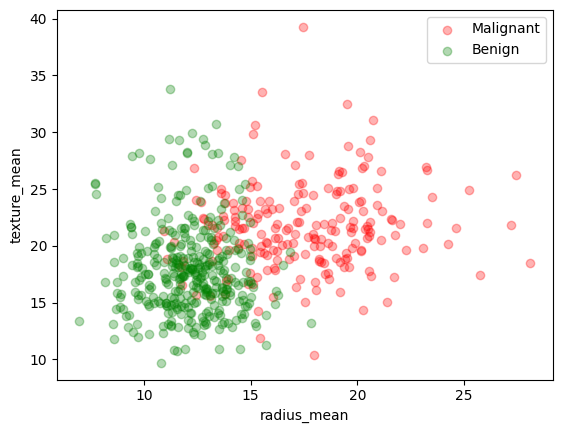

In [30]:
M = data[data.diagnosis == "M"] #Diagnosis transfers all values of M to M data
B = data[data.diagnosis == "B"] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean, color = "green", label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

1 = M (Malignant Cancer Cell)

0 = B (Benign Cancer Cell)

In [31]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis
x_data = data.drop(["diagnosis"],axis = 1)
print("X Data \n",x_data)
print("Y Data \n",y)

X Data 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_

In [32]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [34]:
# X_train data info
print("X Train")
x_train

X Train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0.002122,0.004074,0.013820,0.058886,0.000025,0.000033,0.000074,0.000010,0.000050,0.000019,...,0.002424,0.005324,0.015397,0.076328,0.000035,0.000103,0.000294,0.000041,0.000099,0.000028
181,0.004958,0.006246,0.033545,0.308181,0.000027,0.000067,0.000058,0.000035,0.000056,0.000017,...,0.006272,0.007870,0.041490,0.491067,0.000035,0.000178,0.000159,0.000068,0.000096,0.000030
63,0.002156,0.003258,0.013916,0.061331,0.000018,0.000021,0.000014,0.000005,0.000055,0.000016,...,0.002353,0.004520,0.015418,0.072896,0.000023,0.000039,0.000033,0.000012,0.000077,0.000020
248,0.002504,0.005929,0.015987,0.081570,0.000023,0.000017,0.000006,0.000004,0.000045,0.000015,...,0.002880,0.008272,0.018331,0.107123,0.000035,0.000033,0.000026,0.000014,0.000080,0.000019
60,0.002391,0.003498,0.015174,0.073319,0.000027,0.000019,0.000003,0.000003,0.000064,0.000016,...,0.002591,0.004102,0.016422,0.086648,0.000030,0.000023,0.000005,0.000006,0.000084,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.002089,0.003441,0.013820,0.057358,0.000023,0.000036,0.000020,0.000007,0.000045,0.000021,...,0.002288,0.003684,0.014706,0.066855,0.000028,0.000057,0.000034,0.000011,0.000053,0.000025
106,0.002736,0.004309,0.017670,0.096968,0.000027,0.000024,0.000017,0.000008,0.000042,0.000015,...,0.003089,0.006878,0.020101,0.122638,0.000040,0.000063,0.000068,0.000029,0.000066,0.000021
270,0.003359,0.003954,0.021227,0.148707,0.000015,0.000006,0.000002,0.000001,0.000035,0.000013,...,0.003505,0.004854,0.022200,0.160931,0.000020,0.000012,0.000009,0.000008,0.000058,0.000014
435,0.003286,0.004612,0.021420,0.140926,0.000025,0.000027,0.000026,0.000015,0.000039,0.000015,...,0.004006,0.007240,0.026775,0.204349,0.000038,0.000084,0.000096,0.000043,0.000075,0.000025


In [35]:
x.shape

(569, 30)

In [36]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:
# y_train data info
print("Y Train")
y_train

Y Train


68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

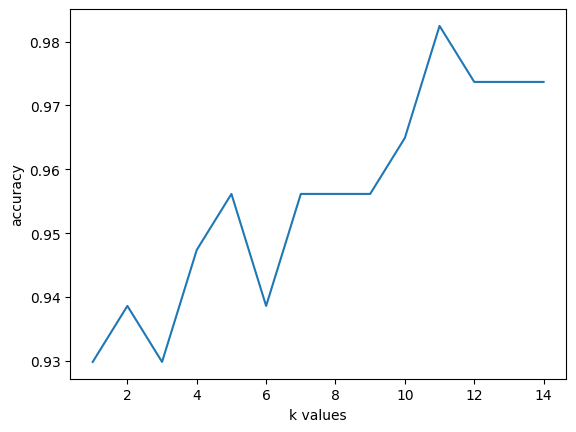

In [38]:
from sklearn.neighbors import KNeighborsClassifier
Score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    Score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),Score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Accuracy Score
------------------------
3 nn Acc Score 0.9298245614035088 
------------------------




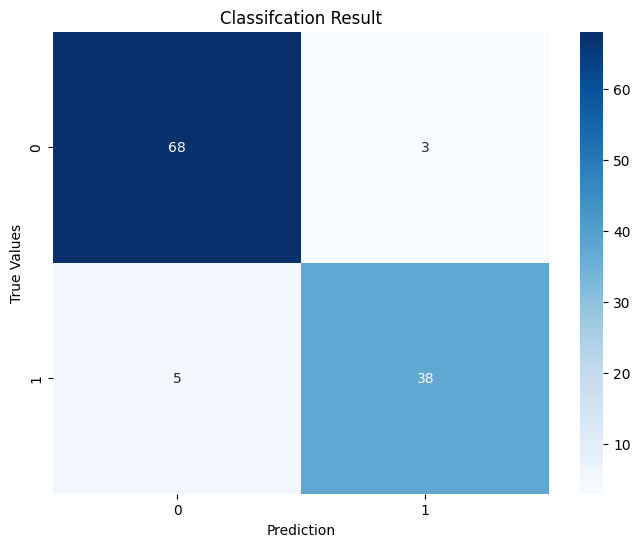



Result Evaluation
------------------------
Sum True Prediction: 106

Sum False Prediction: 8



In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("Accuracy Score")
print("------------------------")
print("{} nn Acc Score {} ".format(3,knn.score(x_test,y_test)))
print("------------------------\n\n")
#seaborntable
cm = confusion_matrix(y_test, prediction.reshape(-1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classifcation Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()
#Result
print("\n")
print("Result Evaluation")
print("------------------------")
print(f'Sum True Prediction: {correct_predictions}\n')
print(f'Sum False Prediction: {incorrect_predictions}\n')

In [40]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [41]:
def get_user_input():
    features = [
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
        'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'
    ]
    
    input_values = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003,
                    0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
    
    return input_values

import numpy as np

# Get user input
input_data = get_user_input()

# Reshape the input data for the model
input_data_reshaped = np.array(input_data).reshape(1, -1)

# Make prediction
prediction = knn.predict(input_data_reshaped)

# Interpret result
if prediction[0] == 1:
    print("The model predicts: Malignant (M) Cancer")
else:
    print("The model predicts: Benign (B) Cancer")

The model predicts: Malignant (M) Cancer


In [43]:
import pickle

In [45]:
import pickle
pickle.dump(knn , open("model.pkl" , "wb"))

model = pickle.load(open("model.pkl", "rb"))